 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Nov/2020 10:50:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:00] "POST /login1 HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:02] "GET /inquiry HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:03] "GET /graphshow HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:04] "GET /assistance HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:05] "GET /regi HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:07] "GET /inquiry HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:09] "POST /show11 HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:12] "GET /graphshow HTTP/1.1" 200 -


[2 2 1]


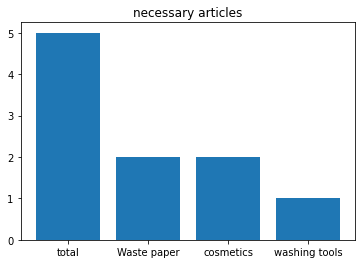

127.0.0.1 - - [30/Nov/2020 10:51:18] "POST /graph HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:23] "GET /assistance HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:27] "POST /helpshow HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:30] "GET /assistance HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:34] "POST /help HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:39] "POST /helpshow HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:44] "GET /inquiry HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:51:45] "GET /regi HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:52:15] "POST /insert HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:52:20] "GET /inquiry HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:52:24] "POST /show11 HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:52:29] "GET /regi HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:52:34] "GET / HTTP/1.1" 200 -


In [ ]:
import sqlite3
from flask import Flask,render_template,request
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#플라스크 객체 생성
app=Flask(__name__)

#-------------------------로그인 페이지-----------------------

#로그인 폼 렌더링
#/ 경로 요청 시 실행 함수
@app.route('/') #요청 경로 지정
def login(): #실행 함수 작성
    return render_template('login.html') #login.html 파일 렌더링


#로그인 처리
#/login1 경로 요청 시 실행 함수
@app.route('/login1', methods=['POST']) #요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def login1(): #실행 함수 작성
    #폼 입력값 가져오기
    idn=request.form['id']
    pwd=request.form['passwd']
    
    #데이터베이스 연결
    conn=sqlite3.connect('welfaremember.db')
    conn.row_factory=sqlite3.Row
    cursor=conn.cursor()
    #계정 id 레코드 읽기
    cursor.execute('select*from loginmeminfo where id=?',(idn,))
    row=cursor.fetchone()
    conn.close()
    
    #계정/비번 조사
    if row!=None:
        if idn==row['id']and pwd==row['passwd']:
            return render_template('registration.html')
        
    return("<h2>로그인 에러!!</h2>")

#-------------------------회원가입 페이지-----------------------

#회원가입 폼 렌더링
#/signup 경로 요청 시 실행 함수
@app.route('/signup') #요청 경로 지정
def signup(): #실행 함수 작성
    return render_template('signup.html') #signup.html 파일 렌더링

#회원가입 처리
#/register 경로 요청 시 실행 함수
@app.route('/register',methods=['POST']) ##요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def register(): #실행 함수 작성
    
    #폼 입력값 가져오기
    idn=request.form['id']
    pwd=request.form['passwd']
    
    #데이터베이스 연결
    conn=sqlite3.connect('welfaremember.db')
    cursor=conn.cursor()
    #데이터베이스 등록(삽입)
    cursor.execute('''
    insert into loginmeminfo (id,passwd) values(?,?)''',(idn,pwd))
    conn.commit()
    conn.close()
    
    return render_template('login.html') #login.html파일 렌더링

#-------------------------등록 페이지-----------------------

#등록 폼 렌더링
#/regi 경로 요청 시 실행 함수
@app.route('/regi') #요청 경로 지정
def regi():   #실행 함수 작성
    return render_template('registration.html') #registration.html 파일 렌더링

#등록처리
#/insert 경로 요청 시 실행 함수
@app.route('/insert',methods=['POST']) #요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def insert(): #실행 함수 작성
    #폼 입력값 가져오기
    na=request.form['name']
    age=request.form['age']
    adr=request.form['address']
    distype=request.form['disability_type']
    
    #데이터베이스 연결
    conn=sqlite3.connect('welfaremember.db')
    cursor=conn.cursor()
    #데이터베이스 삽입
    cursor.execute('''
    insert into meminfo(name,age,address,disability_type)values(?,?,?,?)''',(na,age,adr,distype))
    #데이터베이스 등록된 이름으로 테이블 만들기
    insert='create table {} (help integer, time text)'.format(na)
    cursor.execute(insert)
    conn.commit()
    conn.close()
    
    outstr="<h2>등록되었습니다</h2><br><hr>"
    outstr+="이름: %s <br>"%na
    outstr+="나이: %s <br>"%age
    outstr+="주소: %s <br>"%adr
    outstr+="장애: %s <br>"%distype
    
    return outstr

#-------------------------조회 페이지-----------------------

#조회 폼 렌더링
#/inquiry 경로 요청 시 실행 함수
@app.route('/inquiry') #요청 경로 지정
def inquiry(): #실행 함수 작성
    return render_template('inquiry.html') #inquiry.html 파일 렌더링

#조회처리
#/show11 경로 요청 시 실행 함수
@app.route('/show11',methods=['POST']) #요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def show1(): #실행 함수 작성
    #폼 입력값 가져오기
    na=request.form['name']
    
    #데이터베이스 연결 및 조회
    conn=sqlite3.connect('welfaremember.db')
    conn.row_factory=sqlite3.Row
    cursor=conn.cursor()
    cursor.execute('''select*from meminfo where name=?''',(na,))
    rows=cursor.fetchone()
    
    conn.close()
        
    return render_template('inquiryshow.html',rows=rows) #inquiryshow.html 파일 렌더링, rows보내기

#-------------------------도움 페이지-----------------------

#도움 폼 렌더링
#/assistance 경로 요청 시 실행 함수
@app.route('/assistance') #요청 경로 지정 
def assistance(): #실행 함수 작성
    return render_template('assistance.html') #assistance.html 파일 렌더링

#도움조회처리
#/helpshow 경로 요청 시 실행 함수
@app.route('/helpshow',methods=['POST']) #요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def helpshow(): #실행 함수 작성
    #폼 입력값 가져오기
    na=request.form['name']
    
    #데이터베이스 연결
    conn=sqlite3.connect('welfaremember.db')
    cursor=conn.cursor()
    #데이터베이스 na이름의 데이블 찾기
    show='''select * from {}'''.format(na)
    cursor.execute(show)
    rows=cursor.fetchall()
    
    return render_template('show.html',rows=rows) #show.html 파일 렌더링, rows보내기

#도움등록처리
#/help 경로 요청 시 실행 함수
@app.route('/help', methods=['POST']) #요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def help(): #실행 함수 작성
    import datetime
    
    #폼 입력값 가져오기
    na=request.form['name']
    hp=request.form['help']
    tm=datetime.datetime.now()
    
    #데이터베이스 연결
    conn=sqlite3.connect('welfaremember.db')
    cursor=conn.cursor()
    #데이터베이스 삽입
    insert='insert into {} (help,time) values(?,?)'.format(na)
    cursor.execute(insert,(hp,tm))
    conn.commit()
    conn.close()
    
    return render_template('assistance.html') #assistance.html 파일 렌더링

#-------------------------그래프 페이지-----------------------

#그래프 폼 렌더링
#/graphshow 경로 요청 시 실행 함수
@app.route('/graphshow') #요청 경로 지정
def graphshow(): #실행 함수 작성
    return render_template('graph.html') #graph.html 파일 렌더링

#그래프처리
#/graph 경로 요청 시 실행 함수
@app.route('/graph',methods=['POST']) #요청 경로 지정, form태그의 매개변수 값 전달 방식_POST
def graph(): #실행 함수 작성
    #폼 입력값 가져오기
    na=request.form['name']
    
    #데이터베이스 연결
    conn=sqlite3.connect('welfaremember.db')
    cursor=conn.cursor()
    #데이터베이스 na이름의 데이블 찾기
    show='''select * from {}'''.format(na)
    cursor.execute(show)
    rows=cursor.fetchall()

    a=0
    b=0
    c=0

    for row in rows:
        if row[0]==1:
            a=a+1
        elif row[0]==2:
            b=b+1
        elif row[0]==3:
            c=c+1

    s=np.array([a,b,c]) #ndarray로 변환
    s_none=s.sum() #전체 요소 합
    print(s)

    x=np.arange(4) #주어진 범위와 간격에 따라 균일한 값을 갖는 어레이를 생성하는 함수
    valuetype=['total','Waste paper','cosmetics','washing tools'] #x축에 표시될
    values=[s_none,a,b,c] #막대 그래프의 높이로 표시될 y 값 
    plt.title("necessary articles")
    plt.bar(x,values)
    plt.xticks(x, valuetype)
    plt.show()
    
    return render_template('graph.html') #graph.html 파일 렌더링


#플라스크 서버 구동
if __name__=='__main__':
    app.run()  #실행되는 컴퓨터 IP 주소, 포트번호 5000